In [2]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
df.drop_duplicates(keep='first',inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

In [8]:
label_mappings = {}  # to store mappings for each column

for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    # store mapping for this column
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Encoded {col} with {len(le.classes_)} unique values.")

# Show mappings
#print(label_mappings)
for col, mapping in label_mappings.items():
    print(f"\nColumn: {col}")
    for original, encoded in mapping.items():
        print(f"  {original} → {encoded}")

Encoded Parental_Involvement with 3 unique values.
Encoded Access_to_Resources with 3 unique values.
Encoded Extracurricular_Activities with 2 unique values.
Encoded Motivation_Level with 3 unique values.
Encoded Internet_Access with 2 unique values.
Encoded Family_Income with 3 unique values.
Encoded Teacher_Quality with 3 unique values.
Encoded School_Type with 2 unique values.
Encoded Peer_Influence with 3 unique values.
Encoded Learning_Disabilities with 2 unique values.
Encoded Parental_Education_Level with 3 unique values.
Encoded Distance_from_Home with 3 unique values.
Encoded Gender with 2 unique values.

Column: Parental_Involvement
  High → 0
  Low → 1
  Medium → 2

Column: Access_to_Resources
  High → 0
  Low → 1
  Medium → 2

Column: Extracurricular_Activities
  No → 0
  Yes → 1

Column: Motivation_Level
  High → 0
  Low → 1
  Medium → 2

Column: Internet_Access
  No → 0
  Yes → 1

Column: Family_Income
  High → 0
  Low → 1
  Medium → 2

Column: Teacher_Quality
  High → 0


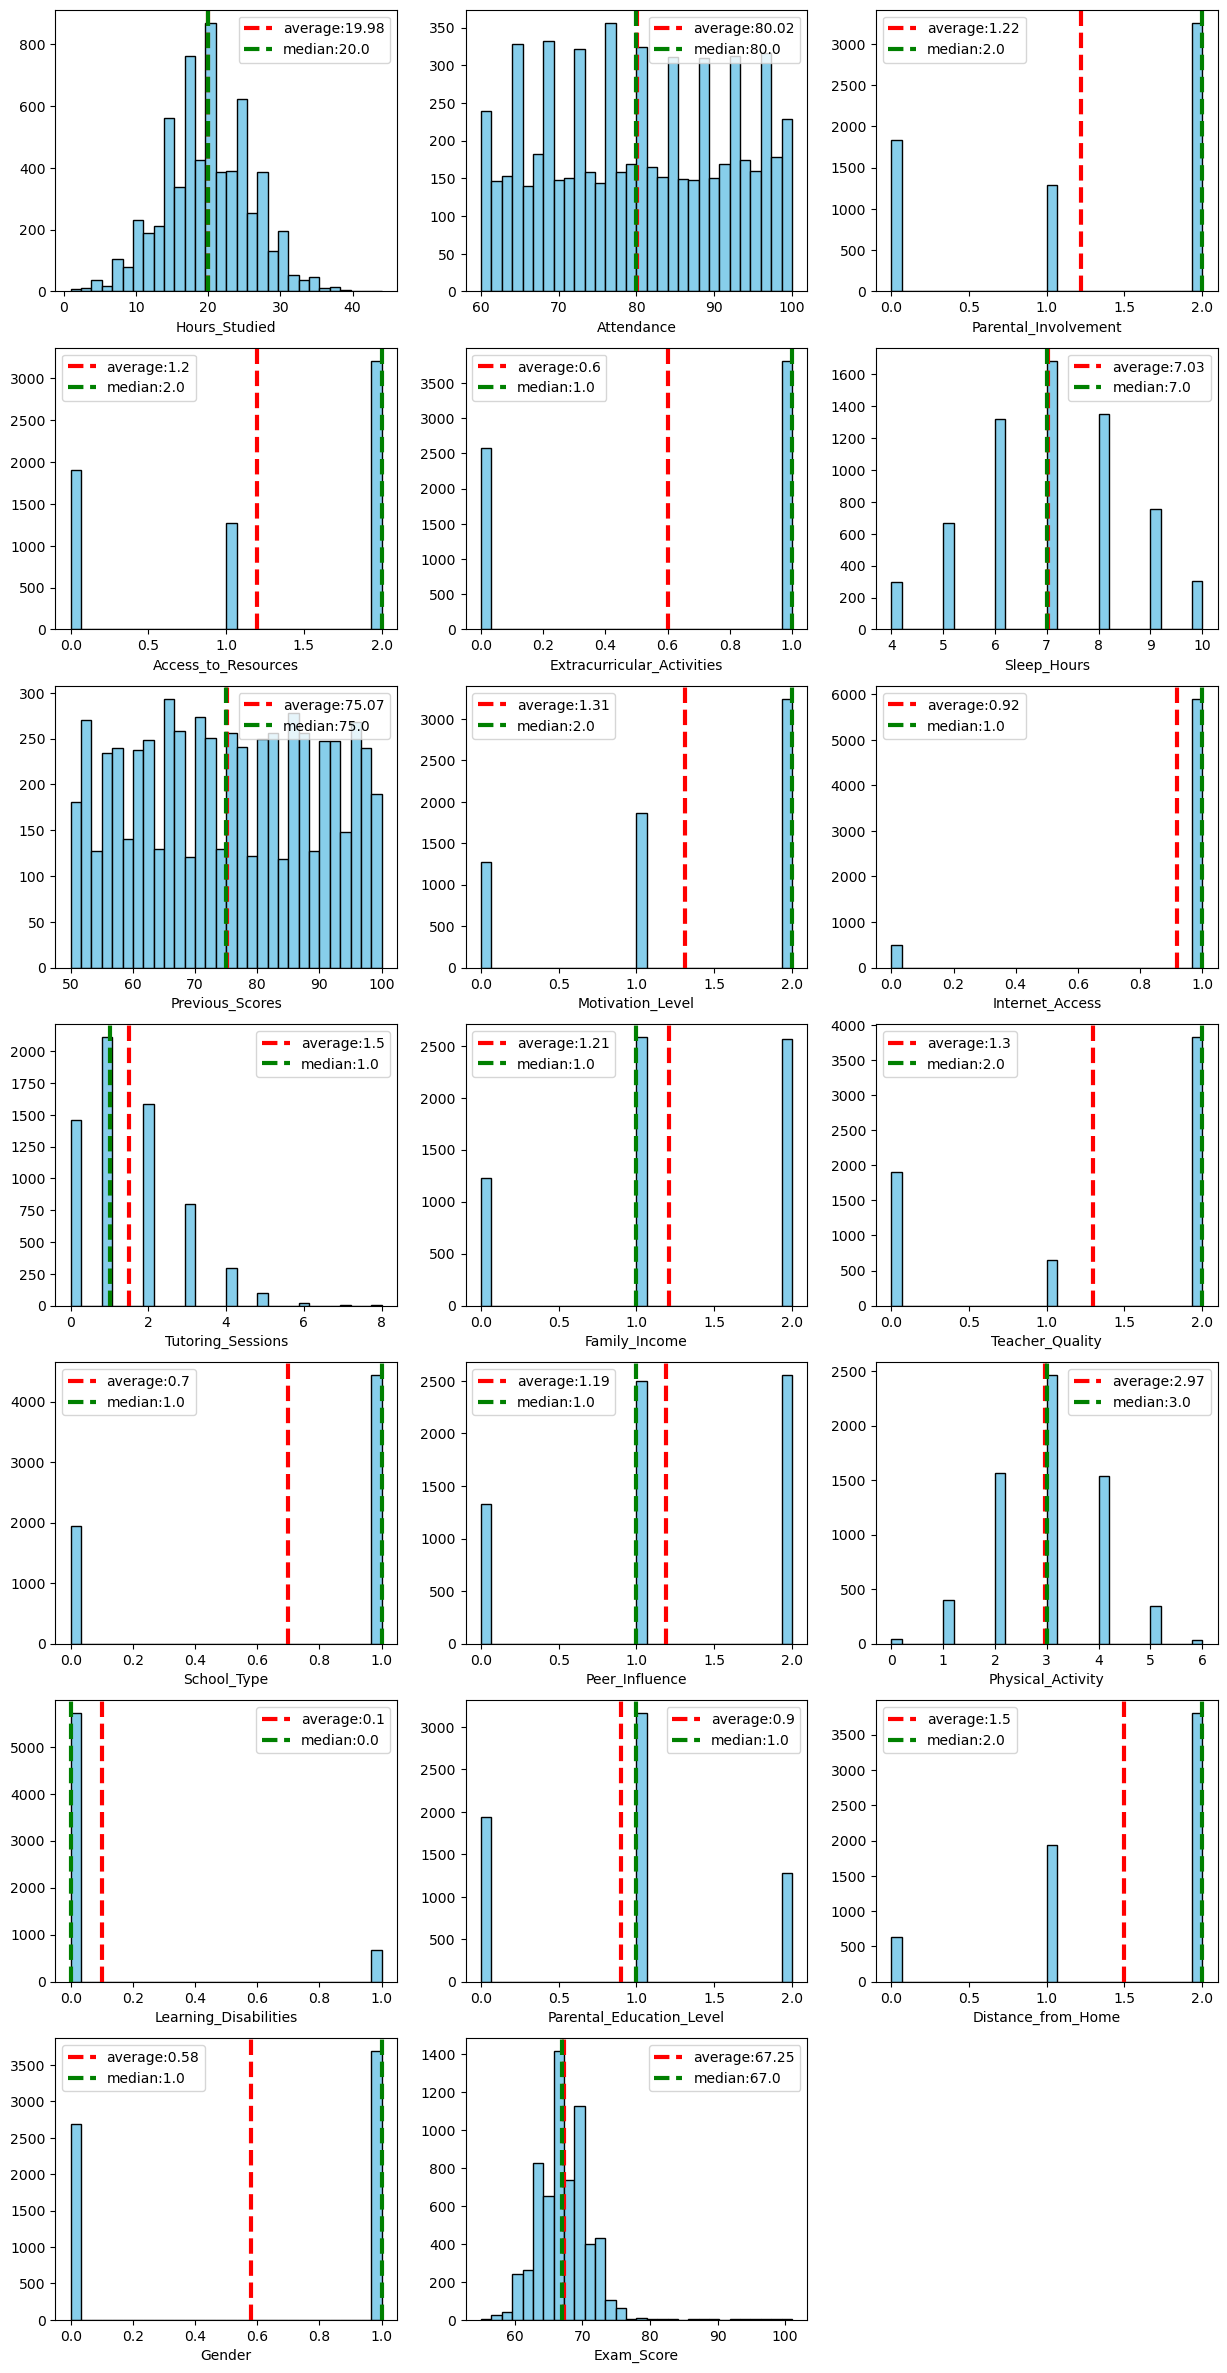

In [9]:
plt.figure(figsize=(15,30))
for ind,col in enumerate(df.columns):
    plt.subplot(7,3,ind+1)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.axvline(np.round(df[col].mean(),2), color='r', linestyle='dashed', linewidth=3)
    plt.axvline(np.round(df[col].median(),2), color='g', linestyle='dashed', linewidth=3)
    plt.legend([f'average:{np.round(df[col].mean(),2)}',f'median:{np.round(df[col].median(),2)}'])
plt.show()

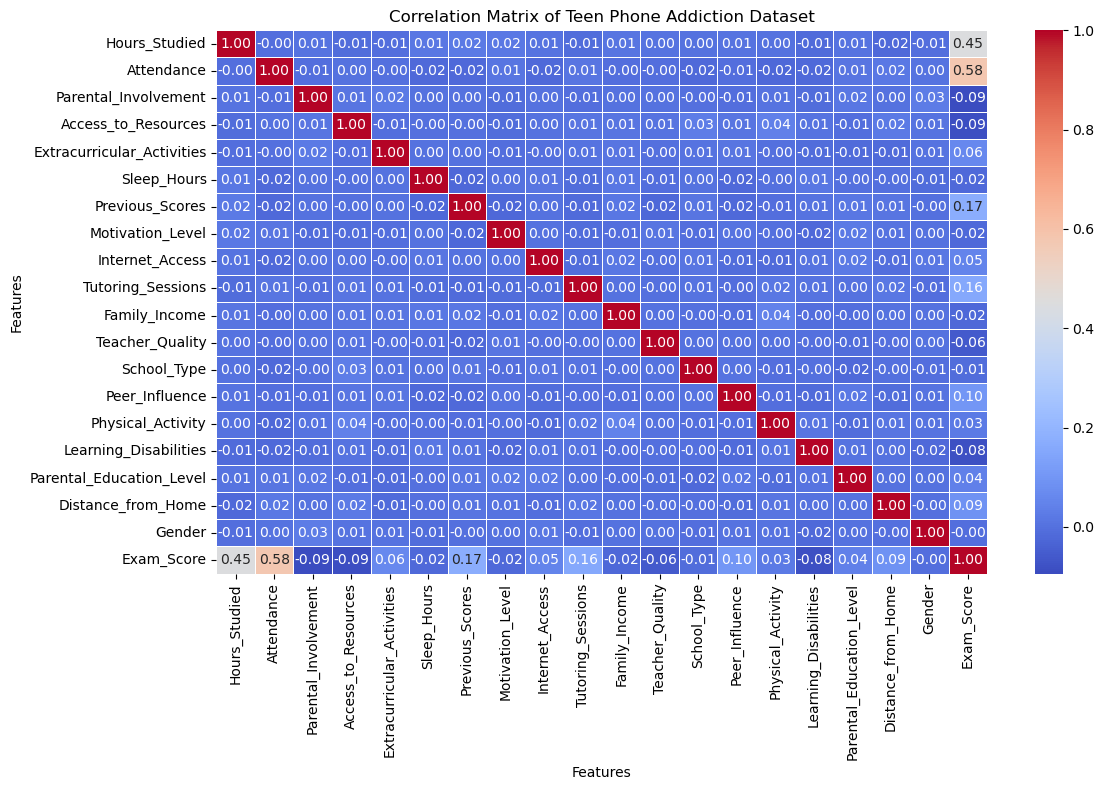

In [10]:
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
seaborn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Teen Phone Addiction Dataset")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [22]:
print(df.columns.tolist())

['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score', 'Cluster']


In [23]:
df.drop(columns=[c for c in ['Gender', 'School_Type','Family_Income','Motivation_Level','Sleep_Hours'] if c in df.columns], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6378 non-null   int64
 1   Attendance                  6378 non-null   int64
 2   Parental_Involvement        6378 non-null   int32
 3   Access_to_Resources         6378 non-null   int32
 4   Extracurricular_Activities  6378 non-null   int32
 5   Previous_Scores             6378 non-null   int64
 6   Internet_Access             6378 non-null   int32
 7   Tutoring_Sessions           6378 non-null   int64
 8   Teacher_Quality             6378 non-null   int32
 9   Peer_Influence              6378 non-null   int32
 10  Physical_Activity           6378 non-null   int64
 11  Learning_Disabilities       6378 non-null   int32
 12  Parental_Education_Level    6378 non-null   int32
 13  Distance_from_Home          6378 non-null   int32
 14  Exam_Score   

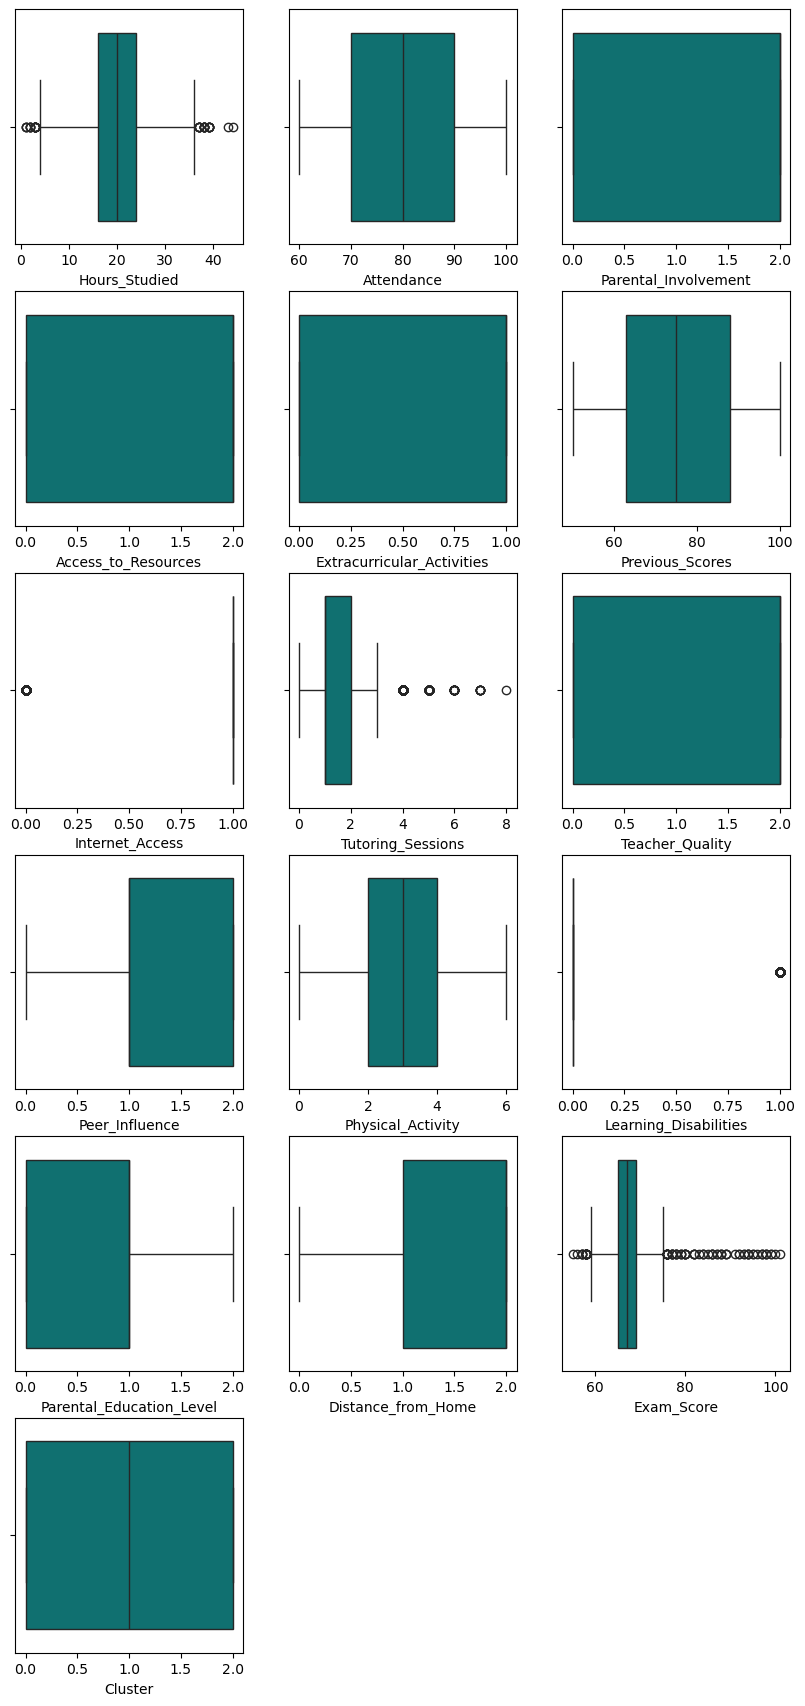

In [24]:
fig = plt.figure(figsize=(10,25))
for i, col in enumerate(df.columns):
  plt.subplot(7,3,i+1)
  seaborn.boxplot(x = df[col], color='teal')
  plt.xlabel(col)

tets


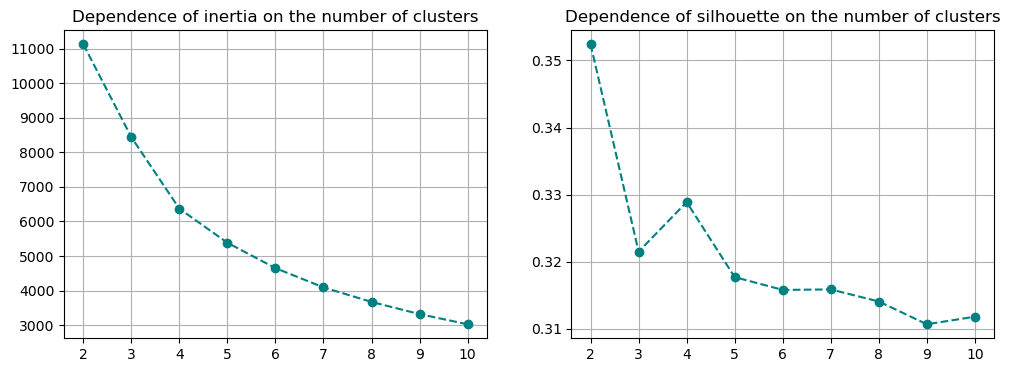

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
cols = ['Cluster']
if all(col in df.columns for col in cols): 
    data=df.drop(cols, axis=1)
    print("tets")
else:
    print("probica")
    data = df.copy()

scaled_data = scaler.fit_transform(data)

#scaled_data=data.copy()
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

inertia = []
siluette = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=18)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)
    if len(set(kmeans.labels_)) > 1:
        siluette.append(silhouette_score(pca_result, kmeans.labels_))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, 'o',linestyle='--', color='teal')
plt.title(f"Dependence of inertia on the number of clusters")
plt.xticks(k_values)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(k_values, siluette, 'o',linestyle='--', color='teal')
plt.title(f"Dependence of silhouette on the number of clusters")
plt.xticks(k_values)
plt.grid()

plt.show()


In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=18)
df['Cluster'] = kmeans.fit_predict(pca_result)

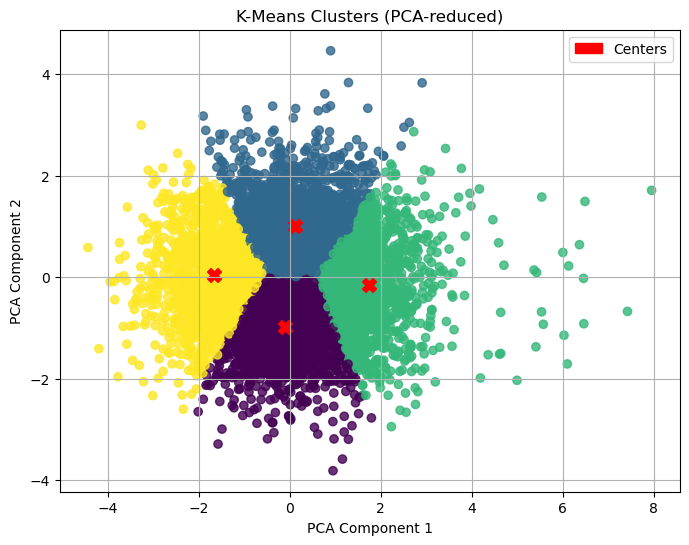

In [33]:
import matplotlib.patches as mpatches

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_result[:, 0], pca_result[:, 1],
    c=df['Cluster'], cmap='viridis', alpha=0.8
)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='X', label='Centers')

legend_handles = []
legend_handles.append(mpatches.Patch(color='red', label='Centers'))

plt.legend(handles=legend_handles, loc='upper right')
plt.title('K-Means Clusters (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()